## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv("01. dhaka homeprices.csv")
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [3]:
df.head(6)

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000


In [4]:
df.shape

(10, 2)

In [5]:
df.isnull().any()

area     False
price    False
dtype: bool

In [6]:
df.isnull().sum()

area     0
price    0
dtype: int64

## Plot

[]

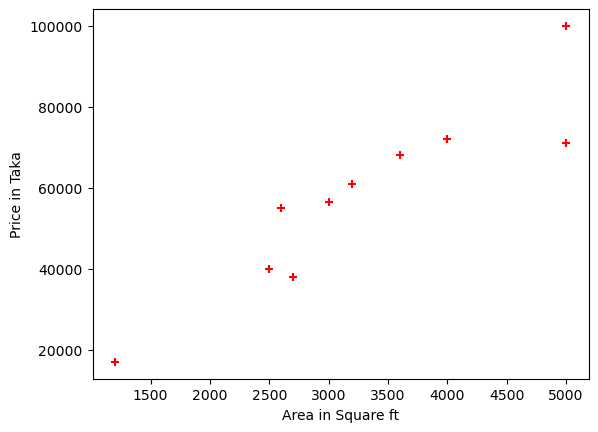

In [48]:
plt.xlabel('Area in Square ft')
plt.ylabel('Price in Taka')
plt.scatter(df['area'],df['price'],color='red',marker='+')
plt.plot()

## Separate dependent and independent variable

In [28]:
x = df[['area']]
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [29]:
y = df[['price']]
y

,price
0,55000
1,56500
2,61000
3,68000
4,72000
5,71000
6,40000
7,38000
8,17000
9,100000


## Split Data set

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state =1)

In [21]:
xtest

2    3200
9    5000
6    2500
Name: area, dtype: int64

In [22]:
xtrain

4    4000
0    2600
3    3600
1    3000
7    2700
8    1200
5    5000
Name: area, dtype: int64

## Fitting Multiple Linear Regression to the Training set

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [34]:
regressor.fit(xtrain,ytrain)

LinearRegression()

In [35]:
regressor.predict(xtest)

array([[54577.95521897],
       [81852.07441554],
       [43971.35330919]])

In [36]:
regressor.predict([[3500]])

c:\Users\Anas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[59123.64175173]])

## Just Checking Value Predicted Value

In [49]:
a = regressor.coef_
a

array([[15.15228844]])

In [50]:
b = regressor.intercept_
b

array([6090.63220283])

## As, Y = MX + C , x = 3500

In [51]:
y = a * 3500 + b
y

array([[59123.64175173]])

#### ( y == regressor.predict([[3500]]) )

## Best fit line

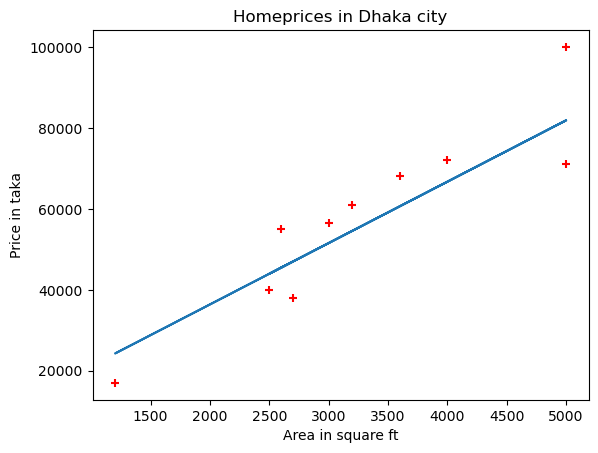

In [47]:
plt.xlabel('Area in square ft')
plt.ylabel('Price in taka')
plt.scatter(df['area'], df['price'],color='red', marker='+')
plt.title('Homeprices in Dhaka city')
plt.plot(df.area,regressor.predict(df[['area']]))
plt.show()

In [43]:
regressor.score(xtest,ytest)

0.7916065214158408

## R2 Value

In [45]:
from sklearn.metrics import r2_score

pred = regressor.predict(xtest)
score=r2_score(ytest,pred)

score

0.7916065214158408